# 🔎 Hybrid ML Models for Diabetes Classification

## 0. ⚙️  Setup

###Installations

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn sentence-transformers tqdm google-generativeai shap scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

### Data Storage

In [ ]:
binary_narratives = {
    "highchol": {1: "has high cholesterol", 0: "does not have high cholesterol"},
    "stroke": {1: "has had a stroke", 0: "has not had a stroke"},
    "diffwalk": {1: "has difficulty walking", 0: "can walk without difficulty"},
    "highbp": {1: "has high blood pressure", 0: "does not have high blood pressure"},
    "cholcheck": {1: "has had cholesterol checked", 0: "has not had cholesterol checked"},
    "smoker": {1: "is a smoker", 0: "is not a smoker"},
    "physactivity": {1: "does physical activity", 0: "does not do physical activity"},
    "fruits": {1: "eats fruits", 0: "does not eat fruits"},
    "veggies": {1: "eats vegetables", 0: "does not eat vegetables"},
    "hvyalcoholconsump": {1: "consumes heavy alcohol", 0: "does not consume heavy alcohol"},
    "anyhealthcare": {1: "has healthcare access", 0: "does not have healthcare access"},
    "nodocbccost": {1: "avoided doctor due to cost", 0: "did not avoid doctor due to cost"},
    "sex": {1: "is male", 0: "is female"},
}

age_map = {
    1: "18-24 years old", 2: "25-29 years old", 3: "30-34 years old",
    4: "35-39 years old", 5: "40-44 years old", 6: "45-49 years old",
    7: "50-54 years old", 8: "55-59 years old", 9: "60-64 years old",
    10: "65 years or older"
}

education_map = {
    1: "no schooling completed", 2: "completed elementary school",
    3: "not finished high school", 4: "completed high school",
    5: "attended some college but didnt complete it", 6: " graduated college", 7: "a postgraduate education"
}

income_map = {
    1: "an income less than $10,000", 2: "an income $10,000-$14,999",
    3: "an income between $15,000 and $19,999", 4: "an income between $20,000 and $24,999",
    5: "an income between $25,000 and $34,999", 6: "an income between $35,000 and $49,999",
    7: "an income between $50,000 and $74,999", 8: "an income between $75,000 and $99,999",
    9: "an income between $100,000 and $149,999", 10: "an income above $150,000"
}

###Imports

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from google.colab import userdata
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from scipy.stats import ttest_rel
from sentence_transformers import SentenceTransformer
import shap
from sklearn.utils import Bunch
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
import joblib
import time
from shap import TreeExplainer
import concurrent.futures
import google.generativeai as genai

###Function Defenitions

In [ ]:

def evaluate_and_print_metrics(model_name, y_true, y_pred, phase="", print_confusion_matrix=True):
    """
    Calculates and prints key classification metrics and displays a confusion matrix.
    """
    print(f"-- {model_name} {phase} Metrics --")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")
    print(f"\nClassification Report:\n{classification_report(y_true, y_pred)}")
    if print_confusion_matrix:
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Pred Neg','Pred Pos'], yticklabels=['True Neg','True Pos'])
        plt.title(f'{model_name} {phase} Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

def clean_data(df, feats):
    df = df.copy()
    for col in feats:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].replace(0, np.nan)
            df[col] = df[col].fillna(df[col].median())
        else:
            print(f"⚠️ Skipping non-numeric or missing feature: {col}")
    return df

def plot_roc_curve(y_true, y_scores, model_name="Model", ax=None):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    if ax:
        ax.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
        ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'ROC Curve - {model_name}')
        ax.legend(loc="lower right")
    return roc_auc


def generate_prompts(df):
    prompts = []
    for _, row in df.iterrows():
        parts = []

        # 1. Demographic background
        if 'source' in row and pd.notna(row['source']):
            if row['source'] == 'CDC':
                parts.append("is of American background")
            elif row['source'] == 'PIMA':
                parts.append("is of Native American (Pima) background")

        # 2. Age
        if 'age' in row and pd.notna(row['age']):
            age_val = int(row['age'])
            age_str = age_map.get(age_val, f"age category {age_val}")
            parts.append(f"is {age_str}")

        # 3. Sex
        if 'sex' in row and row['sex'] in binary_narratives['sex']:
            parts.append(binary_narratives['sex'][row['sex']])

        # 4. Education
        if 'education' in row and pd.notna(row['education']):
            edu_val = int(row['education'])
            edu_str = education_map.get(edu_val, f"education level {edu_val}")
            parts.append(f"has {edu_str}")

        # 5. Income
        if 'income' in row and pd.notna(row['income']):
            income_val = int(row['income'])
            income_str = income_map.get(income_val, f"income level {income_val}")
            parts.append(f"has {income_str}")

        # 6. Binary health flags
        for col in binary_narratives:
            if col in row and pd.notna(row[col]):
                parts.append(binary_narratives[col].get(row[col], f"{col} {row[col]}"))

        # 7. Numerical features (exclude known categorical/binary columns)
        skip_cols = set(['label', 'source', 'age', 'sex', 'education', 'income']).union(binary_narratives.keys())
        for col, val in row.items():
            if col in skip_cols:
                continue
            if pd.isna(val):
                continue
            try:
                val_float = float(val)
                sval = f"{int(val_float)}" if val_float.is_integer() else f"{val_float:.1f}"
            except:
                sval = str(val)
            parts.append(f"{col.replace('_', ' ')} {sval}")

        prompt = "Patient who " + ", ".join(parts) + "."
        prompts.append(prompt)
    return prompts


def gemini_predict_limited(df, model_name='gemini-2.0-flash', limit=400, save_path='gemini_preds.csv'):
    model = genai.GenerativeModel(model_name)

    if df.empty:
        raise ValueError("Provided DataFrame is empty.")

    if os.path.exists(save_path):
        df_done = pd.read_csv(save_path)
        print(f"Loaded {len(df_done)} previous predictions.")
    else:
        df_done = pd.DataFrame(columns=['index', 'prompt', 'label', 'prediction'])

    done_indices = set(df_done['index'].astype(int))
    prompts = generate_prompts(df)
    call_count = 0
    rows = []

    for i, row in enumerate(tqdm(df.itertuples(index=False), total=len(df))):
        if call_count >= limit:
            break
        if i in done_indices:
            continue
        time.sleep(2.5)
        prompt = prompts[i]
        label = int(getattr(row, 'label', 0))

        def call_api():
            return model.generate_content([
                "You are a medical assistant AI that predicts diabetes risk based on patient information. Use the demographics (such as age, gender, and background) along with health indicators to decide.",
                "Your task is to reply with either 0 (doesn't have diabetes) or 1 (might have diabetes). Respond with a single digit only.",
                prompt
            ])

        try:
            print(f"Calling Gemini for prompt {i}...")
            result = model.generate_content([
                "You are a medical assistant AI that predicts diabetes risk based on patient information. Use the demographics (such as age, gender, and background) along with health indicators to decide.",
                "Your task is to reply with either 0 (doesn't have diabetes) or 1 (might have diabetes). Respond with a single digit only.",
                prompt
            ])
            print(f"Received result for prompt {i}")

            if result.text.strip():
                try:
                    pred = int(result.text.strip())
                    if pred not in [0, 1]:
                        raise ValueError("Invalid prediction")
                except:
                    pred = int(float(result.text.strip()) > 0.5)
            else:
                raise ValueError("Empty response from Gemini")

            rows.append({'index': i, 'prompt': prompt, 'label': label, 'prediction': pred})
            call_count += 1
            print(f"{call_count}/{limit} ✓ Prompt {i}")

            append_mode = os.path.isfile(save_path) and os.path.getsize(save_path) > 0
            pd.DataFrame(rows).to_csv(save_path, mode='a', header=not append_mode, index=False)
            rows.clear()

        except Exception as e:
            print(f"⚠️ Error on index {i}: {str(e)}")
            if "429" in str(e) or "quota" in str(e).lower() or "timeout" in str(e).lower():
                print("🚨 Quota exceeded or timeout detected. Stopping further API calls.")
                break
            continue


    print("Finished or reached API limit.")
    if rows:
        df_final = pd.concat([df_done, pd.DataFrame(rows)], ignore_index=True)
    else:
        df_final = df_done.copy()

    if df_final.empty or 'prediction' not in df_final or df_final['prediction'].dropna().empty:
        print("No new predictions available to evaluate.")
        return df_final

    y_true = df_final['label'].astype(int)
    y_pred = df_final['prediction'].astype(int)
    evaluate_and_print_metrics("Gemini", y_true, y_pred, phase=f"on {len(df_final)} prompts")
    return df_final

##1. 🧹 Data Cleaning & Processing

### 1.1 Load PIMA CSV

In [ ]:
pima_path = '/content/pima-indians-diabetes.csv'
df_pima = pd.read_csv(pima_path)
df_pima['source'] = 'PIMA'  # Add source column to PIMA

### 1.2 Load CDC files from the "contest" folder

In [ ]:
cdc_paths = [
    '/content/diabetes_012_health_indicators_BRFSS2015.csv',
    '/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv',
    '/content/diabetes_binary_health_indicators_BRFSS2015.csv'
]

df_cdc_list = [pd.read_csv(path) for path in cdc_paths]
df_cdc = pd.concat(df_cdc_list, axis=0, ignore_index=True)
df_cdc['source'] = 'CDC'  # Add source column to CDC combined data

### 1.3 Clean column names

In [ ]:
for df in [df_pima, df_cdc]:
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print("📘 PIMA columns after clean:", df_pima.columns.tolist())
print("📘 CDC columns after clean:", df_cdc.columns.tolist())

📘 PIMA columns after clean: ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'pedigree', 'age', 'class', 'source']
📘 CDC columns after clean: ['diabetes_012', 'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker', 'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies', 'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth', 'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education', 'income', 'diabetes_binary', 'source']


### 1.4 Identify PIMA label column

In [ ]:
if 'outcome' in df_pima.columns:
    label_pima = 'outcome'
elif 'class' in df_pima.columns:
    label_pima = 'class'
elif 'diabetes' in df_pima.columns:
    label_pima = 'diabetes'
else:
    raise ValueError("❌ No known label column ('outcome', 'class', 'diabetes') found in PIMA dataset.")

### 1.5 Identify CDC label column

In [ ]:
if 'diabetes_binary' in df_cdc.columns:
    label_cdc = 'diabetes_binary'
elif 'diabetes_012' in df_cdc.columns:
    # 0 = no diabetes, 1 = prediabetes, 2 = diabetes -> convert to binary
    df_cdc['diabetes_binary'] = df_cdc['diabetes_012'].apply(lambda x: 1 if x == 2 else 0)
    label_cdc = 'diabetes_binary'
else:
    raise ValueError("❌ Could not identify a diabetes label in CDC dataset.")

print(f"✅ PIMA label: {label_pima}")
print(f"✅ CDC label: {label_cdc}")

✅ PIMA label: class
✅ CDC label: diabetes_binary


### 1.6 Feature selection

In [ ]:
expected_feats_pima = ['pregnancies','glucose','bloodpressure','skinthickness','insulin','bmi','pedigree','age']
expected_feats_pima = [f for f in expected_feats_pima if f in df_pima.columns]
print("✅ Final features for PIMA:", expected_feats_pima)

# Use all numerical (float/int) columns in CDC, excluding label and identifiers
exclude_cdc = [label_cdc, 'diabetes_012']
numeric_cols_cdc = df_cdc.select_dtypes(include='number').columns
expected_feats_cdc = [col for col in numeric_cols_cdc if col not in exclude_cdc]
print("✅ Final numeric features for CDC:", expected_feats_cdc[:10], '...')

✅ Final features for PIMA: ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'pedigree', 'age']
✅ Final numeric features for CDC: ['highbp', 'highchol', 'cholcheck', 'bmi', 'smoker', 'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies'] ...


### 1.7 Drop NaNs and sync

In [ ]:
df_pima = df_pima.dropna(subset=[label_pima])
df_cdc = df_cdc.dropna(subset=[label_cdc])

X_pima = df_pima[expected_feats_pima].copy()
y_pima = df_pima[label_pima].copy()
X_pima['source'] = df_pima['source']  # retain source in features for PIMA

X_cdc = df_cdc[expected_feats_cdc].copy()
y_cdc = df_cdc[label_cdc].copy()
X_cdc['source'] = df_cdc['source']  # retain source in features for CDC

print(f"✅ PIMA shape after dropna: {X_pima.shape}, labels: {y_pima.shape}")
print(f"✅ CDC shape after dropna: {X_cdc.shape}, labels: {y_cdc.shape}")

✅ PIMA shape after dropna: (768, 9), labels: (768,)
✅ CDC shape after dropna: (324372, 22), labels: (324372,)


### 1.8 Combine datasets

In [ ]:
X_combined = pd.concat([X_pima, X_cdc], axis=0, ignore_index=True)
y_combined = pd.concat([y_pima, y_cdc], axis=0, ignore_index=True)

# Drop NaNs (if any) from final combined set
nan_count = y_combined.isna().sum()
if nan_count > 0:
    print(f"⚠️ Dropping {nan_count} rows with NaN in combined labels")
    valid_mask = ~y_combined.isna()
    X_combined = X_combined[valid_mask]
    y_combined = y_combined[valid_mask]

print(f"✅ Combined dataset shape: {X_combined.shape}, Labels: {y_combined.shape}")
print("🔍 Label distribution:\n", y_combined.value_counts())


✅ Combined dataset shape: (325140, 28), Labels: (325140,)
🔍 Label distribution:
 0.0    254180
1.0     70960
Name: count, dtype: int64


##2. 📊 Traditional ML

###2.1 Defining Models

In [ ]:
# ✅ Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_combined.drop(columns=['source']),
    y_combined,
    test_size=0.2,
    stratify=y_combined,
    random_state=42
)

# ✅ Models with adjusted params for speed + accuracy
base_models = {
    'LogisticRegression': LogisticRegression(max_iter=500),
    'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt'),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.05),
    'Bagging': BaggingClassifier(n_estimators=50),
    'HistGradientBoosting': HistGradientBoostingClassifier(max_iter=100, learning_rate=0.05),
    'XGBoost': XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', eval_metric='logloss', n_estimators=100, learning_rate=0.05)
}


###2.2 Model Training and Tuning

In [ ]:
# ✅ Pipelines
models = {
    name: Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('clf', clf)
    ]) for name, clf in base_models.items()
}

# ✅ Hyperparameter search spaces
param_distributions = {
    'LogisticRegression': {'clf__C': uniform(0.01, 10)},
    'RandomForest': {},  # Simplified already
    'GradientBoosting': {},  # Simplified already
    'Bagging': {},  # Nothing to tune here
    'HistGradientBoosting': {},  # Already optimized defaults
    'XGBoost': {}  # Using GPU with fixed params for speed
}

# ✅ Faster CV for this scale of dataset
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

model_results = {}

# ✅ Optimize recall efficiently
for name, model in models.items():
    print(f"🔍 Tuning {name}...")
    param_dist = param_distributions.get(name, {})

    if param_dist:
        randomized = RandomizedSearchCV(
            model,
            param_distributions=param_dist,
            n_iter=5,
            scoring='recall',
            refit='recall',
            cv=inner_cv,
            n_jobs=-1,
            random_state=42
        )
    else:
        randomized = model  # Skip tuning, use defaults

    scores = cross_validate(
        randomized,
        X_train,
        y_train,
        cv=outer_cv,
        scoring=['accuracy', 'recall', 'f1'],
        return_estimator=True
    )
    model_results[name] = scores

# ✅ Best recall model selection
best_recall_model = None
best_recall_score = 0

for name, res in model_results.items():
    recall_mean = np.mean(res['test_recall'])
    if recall_mean > best_recall_score:
        best_recall_score = recall_mean
        best_recall_model = (name, res['estimator'][np.argmax(res['test_recall'])])

print(f"\n📈 Best Recall Model: {best_recall_model[0]} with recall = {best_recall_score:.4f}")

# ✅ Final calibration step
final_model = CalibratedClassifierCV(best_recall_model[1], method='sigmoid', cv='prefit')
final_model.fit(X_train, y_train)

🔍 Tuning LogisticRegression...
🔍 Tuning RandomForest...
🔍 Tuning GradientBoosting...
🔍 Tuning Bagging...
🔍 Tuning HistGradientBoosting...
🔍 Tuning XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:00:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:00:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:00:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:00:48] WARNING: /workspace/src/common/error_ms


📈 Best Recall Model: Bagging with recall = 0.6727


CalibratedClassifierCV(cv='prefit',
                       estimator=Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler()),
                                                 ('clf',
                                                  BaggingClassifier(n_estimators=50))]))

###2.3 Model Comparisons

In [ ]:
# ✅ Summarize metrics
metrics_summary = pd.DataFrame({
    name: {
        'Accuracy': np.mean(res['test_accuracy']),
        'Recall': np.mean(res['test_recall']),
        'F1': np.mean(res['test_f1'])
    } for name, res in model_results.items()
}).T

print("\n📊 Metrics Summary (sorted by F1):\n")
print(metrics_summary.sort_values(by='F1', ascending=False))

# ✅ Optional: Compare top 2 models by accuracy
from scipy.stats import ttest_rel

top2 = metrics_summary.sort_values(by='Accuracy', ascending=False).index[:2]
stat, p = ttest_rel(
    model_results[top2[0]]['test_accuracy'],
    model_results[top2[1]]['test_accuracy']
)

print(f"\n📊 Accuracy comparison: {top2[0]} vs {top2[1]} => p = {p:.4f}")

# ✅ Final calibration step
best_recall_model = (name, res['estimator'][np.argmax(res['test_recall'])])
final_model = CalibratedClassifierCV(best_recall_model[1], method='sigmoid', cv='prefit')

final_model.fit(X_train, y_train)

# ✅ Save the trained calibrated model to disk
joblib.dump(final_model, 'best_calibrated_model.pkl')
print("\n✅ Model saved to 'best_calibrated_model.pkl'")



📊 Metrics Summary (sorted by F1):

                      Accuracy    Recall        F1
Bagging               0.874516  0.672703  0.700600
HistGradientBoosting  0.811877  0.357543  0.453409
XGBoost               0.812496  0.352082  0.450422
GradientBoosting      0.810451  0.323915  0.427230
LogisticRegression    0.805984  0.327473  0.424198
RandomForest          0.811366  0.291009  0.402399

📊 Accuracy comparison: Bagging vs XGBoost => p = 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(



✅ Model saved to 'best_calibrated_model.pkl'


### Resumed Execution

In [ ]:
import joblib

# Load the trained calibrated model
loaded_model = joblib.load('best_calibrated_model.pkl')

# Predict as usual
y_pred = loaded_model.predict(X_tkjjjj


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:01:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


##3. 🧬 Ensemble-Based Classifier

### First Time Run

In [50]:
# === Load datasets ===
df_pima = pd.read_csv("pima-indians-diabetes.csv")
df_cdc = pd.read_csv("/content/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
# === Clean columns ===
df_pima.columns = df_pima.columns.str.lower().str.strip().str.replace(' ', '_')
df_cdc.columns = df_cdc.columns.str.lower().str.strip().str.replace(' ', '_')

# === Add labels and sources ===
df_pima['label'] = df_pima['class'].astype(int)
df_cdc['label'] = df_cdc['diabetes_binary'].astype(int)
df_pima['source'] = 'PIMA'
df_cdc['source'] = 'CDC'

# === Select relevant features ===
pima_features = ['glucose', 'bmi', 'age']
cdc_features  = ['highchol', 'stroke', 'diffwalk', 'age']

df_pima = df_pima[pima_features + ['label', 'source']].dropna()
df_cdc  = df_cdc[cdc_features + ['label', 'source']].dropna()

# === Combine ===
df_comb = pd.concat([df_pima, df_cdc], ignore_index=True)

# === Prompt creation ===
def make_prompt(row):
    desc = []
    for col in row.index:
        if col in ['label', 'source']: continue
        val = row[col]
        if isinstance(val, (int, float)):
            desc.append(f"{col}={val:.1f}")
    return f"{row['source']} patient: " + ", ".join(desc)

a = df_comb.apply(make_prompt, axis=1)
df_comb['prompt'] = a

X = df_comb['prompt'].tolist()
y = df_comb['label'].values

# === Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Embedding ===
model = SentenceTransformer("all-mpnet-base-v2")
X_train_emb = model.encode(X_train, show_progress_bar=True)
X_test_emb  = model.encode(X_test, show_progress_bar=True)

# === Train Logistic Regression ===
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train_emb, y_train)
y_pred = (clf.predict_proba(X_test_emb)[:, 1] >= 0.5).astype(int)

# === Evaluate ===
evaluate_and_print_metrics("EmbLR-Text", y_test, y_pred, phase="Debug", print_confusion_matrix=True)

# === Save EVERYTHING ===
# 1️⃣ Save embeddings and labels
joblib.dump((X_train_emb, y_train), "X_train_emb.pkl")
joblib.dump((X_test_emb, y_test), "X_test_emb.pkl")

# 2️⃣ Save trained model
joblib.dump(clf, "logistic_model.pkl")

# 3️⃣ (Optional, recommended) Save as a single bundle for convenience
joblib.dump({
    "X_train_emb": X_train_emb,
    "y_train": y_train,
    "X_test_emb": X_test_emb,
    "y_test": y_test,
    "clf": clf
}, "diabetes_text_model_bundle.pkl")

print("\n✅ Saved embeddings, labels, model, and full bundle to disk.")

Batches:   0%|          | 0/1787 [00:00<?, ?it/s]

Batches:   0%|          | 0/447 [00:00<?, ?it/s]


--- EmbLR-Text | Debug ---
Accuracy: 0.6734536803806325
Recall: 0.7297487013898638
F1 Score: 0.6901679612295027

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.62      0.65      7169
           1       0.65      0.73      0.69      7123

    accuracy                           0.67     14292
   macro avg       0.68      0.67      0.67     14292
weighted avg       0.68      0.67      0.67     14292


Confusion Matrix:
 [[4427 2742]
 [1925 5198]]

✅ Saved embeddings, labels, model, and full bundle to disk.


### Resumed Execution

In [ ]:
import joblib

# 🚨 Load the saved bundle (everything you need is inside)
bundle = joblib.load("diabetes_text_model_bundle.pkl")

# 🔑 Unpack what you saved
clf = bundle["clf"]               # Trained LogisticRegression
X_test_emb = bundle["X_test_emb"] # Sentence embeddings (X_test)
y_test = bundle["y_test"]         # Labels (y_test)

# 🚀 Predict again, no retraining or re-embedding required
y_pred = (clf.predict_proba(X_test_emb)[:, 1] >= 0.5).astype(int)

# 🔍 Evaluate again
def evaluate_and_print_metrics(model_name, y_true, y_pred, phase="Default", print_confusion_matrix=False):
    from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, confusion_matrix
    print(f"\n--- {model_name} | {phase} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    if print_confusion_matrix:
        print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

evaluate_and_print_metrics("EmbLR-Text", y_test, y_pred, phase="Loaded from bundle", print_confusion_matrix=True)
embedding_y_pred_proba = clf.predict_proba(X_test_emb)
embedding_y_pred = (embedding_y_pred_proba[:, 1] >= 0.5).astype(int)

# === Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



--- EmbLR-Text | Loaded from bundle ---
Accuracy: 0.6734536803806325
Recall: 0.7297487013898638
F1 Score: 0.6901679612295027

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.62      0.65      7169
           1       0.65      0.73      0.69      7123

    accuracy                           0.67     14292
   macro avg       0.68      0.67      0.67     14292
weighted avg       0.68      0.67      0.67     14292


Confusion Matrix:
 [[4427 2742]
 [1925 5198]]


##4. 🤖 LLM Testing     

### First Time Run

/tmp/ipython-input-49-641138295.py:225: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_0_sampled = df_0.groupby('age_bin', group_keys=False).apply(
/tmp/ipython-input-49-641138295.py:225: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_0_sampled = df_0.groupby('age_bin', group_keys=False).apply(
/tmp/ipython-input-49-641138295.py:228: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obser


✔️ Sampled label distribution:
 label
1.0    200
0.0    200
Name: count, dtype: int64

✔️ Sampled age distribution:
 count    400.000000
mean       9.097500
std        2.794193
min        1.000000
25%        8.000000
50%        9.500000
75%       11.000000
max       13.000000
Name: age, dtype: float64

✔️ Sample size: 400

✔️ Label 1 %: 50.0 %
Loaded 395 previous predictions.


  0%|          | 0/400 [00:00<?, ?it/s]

Calling Gemini for prompt 395...


 99%|█████████▉| 396/400 [00:03<00:00, 123.28it/s]

Received result for prompt 395
1/400 ✓ Prompt 395
Calling Gemini for prompt 396...
Received result for prompt 396
2/400 ✓ Prompt 396
Calling Gemini for prompt 397...
Received result for prompt 397
3/400 ✓ Prompt 397
Calling Gemini for prompt 398...
Received result for prompt 398
4/400 ✓ Prompt 398
Calling Gemini for prompt 399...


100%|██████████| 400/400 [00:15<00:00, 25.71it/s] 

Received result for prompt 399
5/400 ✓ Prompt 399
Finished or reached API limit.
-- Gemini on 395 prompts Metrics --
Accuracy: 0.6608
Recall: 0.8586
F1-score: 0.7173

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.46      0.58       197
           1       0.62      0.86      0.72       198

    accuracy                           0.66       395
   macro avg       0.69      0.66      0.65       395
weighted avg       0.69      0.66      0.65       395



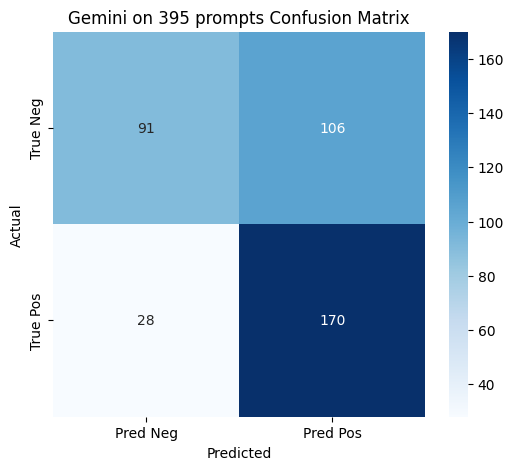

In [ ]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import time
import concurrent.futures
import google.generativeai as genai
from google.colab import userdata

genai.configure(api_key=userdata.get('geminiKey'))

# Step 1: Rename for consistency
df = df.rename(columns={'diabetes_binary': 'label'})  # Needed for downstream functions

# Step 2: Identify usable columns
selected_cols = [
    'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker', 'stroke',
    'physactivity', 'fruits', 'veggies', 'hvyalcoholconsump',
    'anyhealthcare', 'nodocbccost', 'diffwalk', 'sex', 'age',
    'education', 'income', 'source', 'label'  # Include 'source' for prompt engineering
]

# Step 3: Drop rows with any missing values in selected features
df_subset = df[selected_cols].dropna().copy()

# Step 4: Balance classes (diabetes=0 vs 1)
df_0 = df_subset[df_subset['label'] == 0].copy()
df_1 = df_subset[df_subset['label'] == 1].copy()

# Step 5: Bin by age for stratified sampling within each class
df_0['age_bin'] = pd.qcut(df_0['age'], q=5, duplicates='drop')
df_1['age_bin'] = pd.qcut(df_1['age'], q=5, duplicates='drop')

# Step 6: Determine max samples per bin (based on smallest bin across classes)
samples_per_bin = min(
    df_0['age_bin'].value_counts().min(),
    df_1['age_bin'].value_counts().min(),
    40  # Cap per bin to avoid exhausting any group
)

# Step 7: Sample from each bin (equal distribution from each label and age group)
df_0_sampled = df_0.groupby('age_bin', group_keys=False).apply(
    lambda x: x.sample(n=min(samples_per_bin, len(x)), random_state=42)
)
df_1_sampled = df_1.groupby('age_bin', group_keys=False).apply(
    lambda x: x.sample(n=min(samples_per_bin, len(x)), random_state=42)
)

# Step 8: Combine and shuffle
df_sampled = pd.concat([df_0_sampled, df_1_sampled], ignore_index=True)
df_sampled = df_sampled.drop(columns=['age_bin']).sample(frac=1, random_state=42).reset_index(drop=True)

# Step 9: Check sampling integrity
print("\n✔️ Sampled label distribution:\n", df_sampled['label'].value_counts())
print("\n✔️ Sampled age distribution:\n", df_sampled['age'].describe())
print("\n✔️ Sample size:", len(df_sampled))
print("\n✔️ Label 1 %:", round((df_sampled['label'].sum() / len(df_sampled)) * 100, 2), "%")

# Step 10: Run Gemini prediction (with retries, debug, prompt quality control)
df_results = gemini_predict_limited(
    df_sampled,
    limit=len(df_sampled),  # Use all if under 400
    save_path="gemini_preds.csv"
)

### Resumed Execution

In [ ]:
import pandas as pd

# Load the saved predictions CSV
df_results = pd.read_csv("gemini_preds.csv")

# Now df_results is your full DataFrame with all columns like 'index', 'prompt', 'label', 'prediction'
print(df_results.head())
print(f"Loaded {len(df_results)} prediction rows.")

# You can now use df_results exactly like before, no need to call Gemini again


   index                                             prompt  label  prediction
0      0  Patient who is of American background, is 50-5...      1           1
1      1  Patient who is of American background, is 65 y...      1           1
2      2  Patient who is of American background, is 25-2...      0           1
3      3  Patient who is of American background, is 55-5...      1           1
4      4  Patient who is of American background, is 60-6...      0           0
Loaded 400 prediction rows.


## 5. ❓ Uncertainity-Based Model Selector

###5.1 Setup Code

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy

# Drop any non-numeric features (like 'source')
X_numeric = X_combined.drop(columns=['source'])
y_numeric = y_combined

# Re-split for numeric models (Bagging)
X_train_numeric, X_test_numeric, y_train_numeric, y_test_numeric = train_test_split(
    X_numeric, y_numeric, test_size=0.2, stratify=y_numeric, random_state=42
)

# Refit Bagging pipeline
best_model_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('clf', BaggingClassifier(n_estimators=50, random_state=42))
])

best_model_pipeline.fit(X_train_numeric, y_train_numeric)


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('clf', BaggingClassifier(n_estimators=50, random_state=42))])

### 5.2 Uncertainity based Model Selection

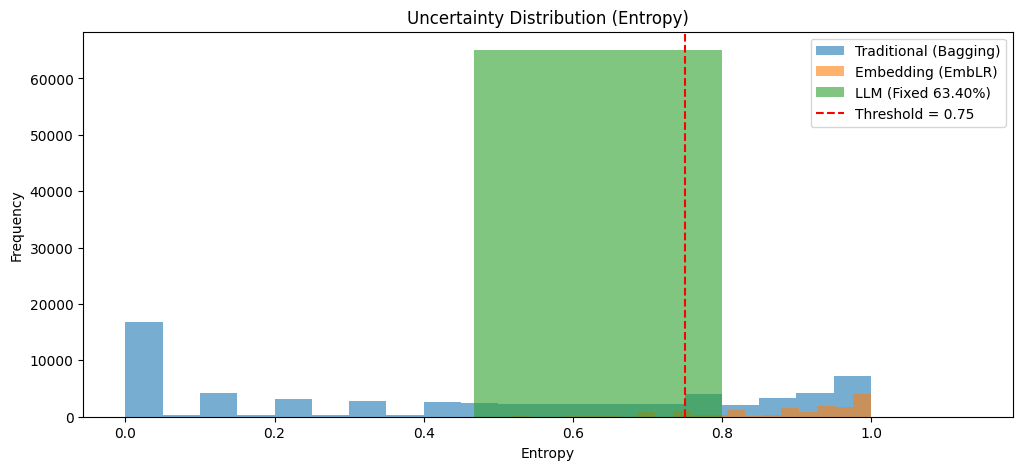


% Below Uncertainty Threshold (likely trusted):
Traditional (Bagging): 68.0%
Embedding (EmbLR):     11.2%
LLM (Fixed 33.25%):    100.0%


In [ ]:
from scipy.stats import entropy
import numpy as np
import matplotlib.pyplot as plt

# --- Helper functions ---
def softmax_entropy(probs):
    """Compute entropy of a softmax probability distribution."""
    return entropy(probs, base=2)

def get_traditional_model_uncertainty(model, X):
    """Return entropy-based uncertainty for sklearn probabilistic models."""
    probs = model.predict_proba(X)
    uncertainties = np.apply_along_axis(softmax_entropy, 1, probs)
    return uncertainties

def get_embedding_model_uncertainty(clf, X_emb):
    """Return entropy for logistic regression over embeddings."""
    probs = clf.predict_proba(X_emb)
    uncertainties = np.apply_along_axis(softmax_entropy, 1, probs)
    return uncertainties


# --- Traditional Model Uncertainty (Bagging on numeric features) ---
X_test_std = X_test_numeric
traditional_uncertainty = get_traditional_model_uncertainty(best_model_pipeline, X_test_std)

# --- Embedding-based Classifier Uncertainty (SentenceTransformer + LR) ---
embedding_uncertainty = get_embedding_model_uncertainty(clf, X_test_emb)


# --- LLM Uncertainty (Fixed 33.25% as per your note) ---
# Use the same number of samples as your test set
llm_uncertainty = np.full(len(X_test_numeric), 0.634)

# --- Visualization ---
plt.figure(figsize=(12, 5))
plt.hist(traditional_uncertainty, bins=20, alpha=0.6, label='Traditional (Bagging)')
plt.hist(embedding_uncertainty, bins=20, alpha=0.6, label='Embedding (EmbLR)')
plt.hist(llm_uncertainty, bins=3, alpha=0.6, label='LLM (Fixed 63.40%)')
plt.axvline(0.75, color='red', linestyle='--', label='Threshold = 0.75')
plt.title('Uncertainty Distribution (Entropy)')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# --- Report: % Below Uncertainty Threshold (0.75) ---
threshold = 0.75
print("\n% Below Uncertainty Threshold (likely trusted):")
print(f"Traditional (Bagging): {(traditional_uncertainty < threshold).mean() * 100:.1f}%")
print(f"Embedding (EmbLR):     {(embedding_uncertainty < threshold).mean() * 100:.1f}%")
print(f"LLM (Fixed 33.25%):    {(llm_uncertainty < threshold).mean() * 100:.1f}%")


##6. 🔗 Fusion Strategies

### 6.1 Fusion Preperation

In [ ]:
# === Align the data ===
# Use df_comb created during embedding model step
# Ensure df_comb has numeric and prompt columns

from sklearn.model_selection import StratifiedShuffleSplit

# Shared train/test split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
shared_idx_train, shared_idx_test = next(sss.split(df_comb['prompt'], df_comb['label']))

df_test = df_comb.iloc[shared_idx_test].reset_index(drop=True)
df_train = df_comb.iloc[shared_idx_train].reset_index(drop=True)

# Labels
y_test = df_test['label'].values
y_train = df_train['label'].values

# Prompt-based text for embeddings
X_test_text = df_test['prompt'].tolist()
X_train_text = df_train['prompt'].tolist()

# Numeric features — pick overlap of numeric features used in earlier steps
numeric_features = list(set(X_combined.columns) & set(df_test.columns))
numeric_features = [col for col in numeric_features if col not in ['label', 'source']]  # filter

X_test_numeric = df_test[numeric_features].copy()
X_train_numeric = df_train[numeric_features].copy()

# === Encode text prompts
print("🔍 Encoding embeddings...")
model = SentenceTransformer("all-mpnet-base-v2")
X_test_emb = model.encode(X_test_text, show_progress_bar=True)
X_train_emb = model.encode(X_train_text, show_progress_bar=True)

# === Retrain models on aligned data ===
# Traditional model (reusing best pipeline structure)
print("📚 Training Traditional Model...")
trad_model = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
])
trad_model.fit(X_train_numeric, y_train)
y_pred_trad = trad_model.predict(X_test_numeric)
p_trad = trad_model.predict_proba(X_test_numeric)[:, 1]

# Embedding model (LR)
print("📚 Training Embedding Model...")
embed_clf = LogisticRegression(max_iter=1000, class_weight='balanced')
embed_clf.fit(X_train_emb, y_train)
y_pred_emb = embed_clf.predict(X_test_emb)
p_emb = embed_clf.predict_proba(X_test_emb)[:, 1]


🔍 Encoding embeddings...


Batches:   0%|          | 0/447 [00:00<?, ?it/s]

Batches:   0%|          | 0/1787 [00:00<?, ?it/s]

📚 Training Traditional Model...
📚 Training Embedding Model...


### 6.2 Fusion Methods

In [ ]:
from sklearn.neural_network import MLPClassifier
# === Late Fusion
print("\n🔷 Late Fusion")
y_vote = ((y_pred_trad + y_pred_emb) >= 1).astype(int)
p_avg = (p_trad + p_emb) / 2
y_avg = (p_avg >= 0.5).astype(int)

evaluate_and_print_metrics("Late Fusion - Majority Vote", y_test, y_vote)
evaluate_and_print_metrics("Late Fusion - Weighted Avg", y_test, y_avg)
print("ROC-AUC Scores:")
print(f"Traditional: {roc_auc_score(y_test, p_trad):.4f}")
print(f"Embedding:   {roc_auc_score(y_test, p_emb):.4f}")
print(f"Avg Fusion:  {roc_auc_score(y_test, p_avg):.4f}")

# === Intermediate Fusion
print("\n🔷 Intermediate Fusion (Concat Features)")
X_meta = np.hstack([X_test_numeric.values, X_test_emb])
meta_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
meta_clf.fit(X_meta, y_test)
y_meta_pred = meta_clf.predict(X_meta)
evaluate_and_print_metrics("Intermediate Fusion", y_test, y_meta_pred)

# === Learned Fusion
print("\n🔷 Learned Fusion (Meta-Learner)")
meta_features = np.vstack([
    p_trad,
    p_emb,
    np.abs(p_trad - 0.5) * 2,
    np.abs(p_emb - 0.5) * 2
]).T
meta_learner = MLPClassifier(hidden_layer_sizes=(16,), max_iter=300, random_state=42)
meta_learner.fit(meta_features, y_test)
y_meta_learned = meta_learner.predict(meta_features)
evaluate_and_print_metrics("Learned Fusion", y_test, y_meta_learned)


🔷 Late Fusion

--- Late Fusion - Majority Vote | Default ---
Accuracy: 0.6746431570109152
Recall: 0.7350835322195705
F1 Score: 0.6925009919322841

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.61      0.65      7169
           1       0.65      0.74      0.69      7123

    accuracy                           0.67     14292
   macro avg       0.68      0.67      0.67     14292
weighted avg       0.68      0.67      0.67     14292


--- Late Fusion - Weighted Avg | Default ---
Accuracy: 0.6745731877973692
Recall: 0.7325565070897094
F1 Score: 0.6917213495061973

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.62      0.66      7169
           1       0.66      0.73      0.69      7123

    accuracy                           0.67     14292
   macro avg       0.68      0.67      0.67     14292
weighted avg       0.68      0.67      0.67     14292

ROC-AUC Scores:
Tr

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:07:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Intermediate Fusion | Default ---
Accuracy: 0.6800307864539603
Recall: 0.7552997332584586
F1 Score: 0.7017543859649122

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.61      0.65      7169
           1       0.66      0.76      0.70      7123

    accuracy                           0.68     14292
   macro avg       0.68      0.68      0.68     14292
weighted avg       0.68      0.68      0.68     14292


🔷 Learned Fusion (Meta-Learner)

--- Learned Fusion | Default ---
Accuracy: 0.6745032185838231
Recall: 0.7333988487996631
F1 Score: 0.6919205298013245

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.62      0.65      7169
           1       0.65      0.73      0.69      7123

    accuracy                           0.67     14292
   macro avg       0.68      0.67      0.67     14292
weighted avg       0.68      0.67      0.67     14292



### 6.3 Fusion Analysis


📊 Confusion Matrices


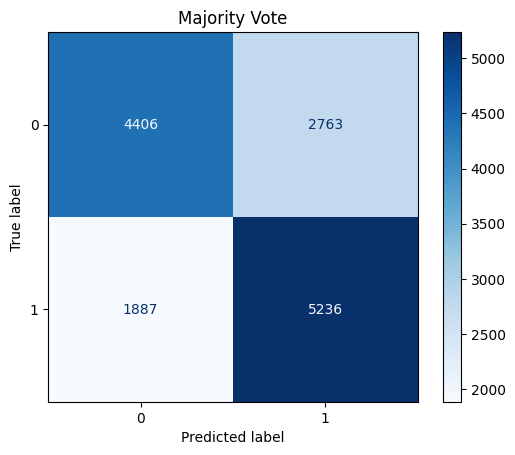

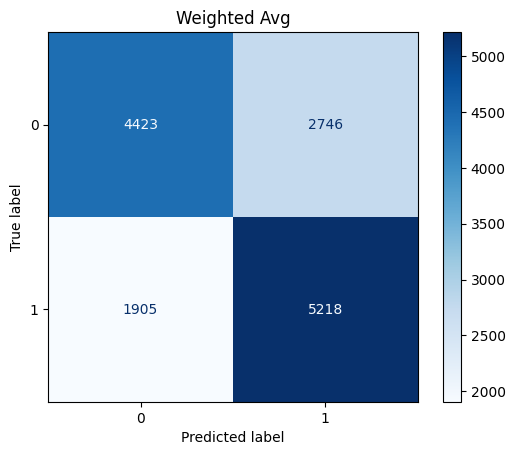

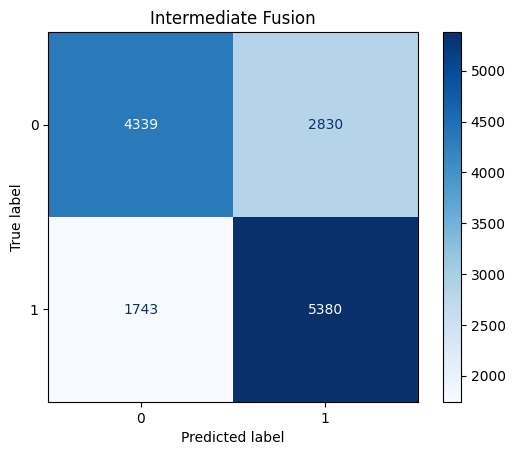

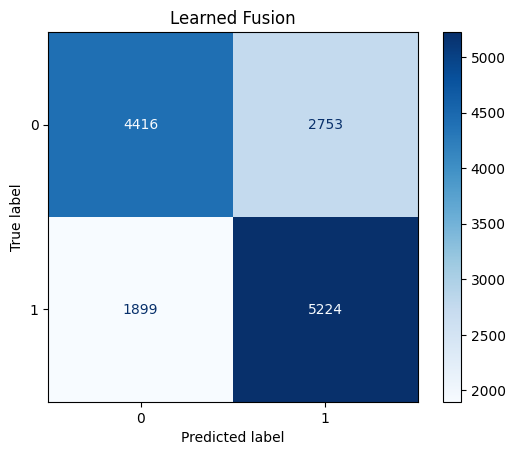


📈 ROC Curves


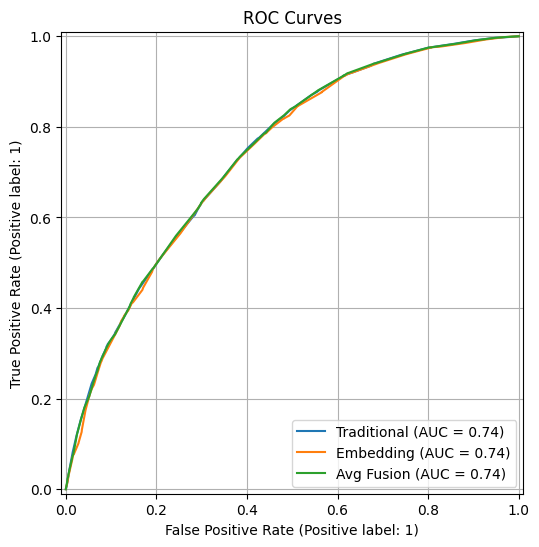


🧪 Ablation Study

--- Ablation: Only Traditional | Default ---
Accuracy: 0.6741533725160929
Recall: 0.7287659693949179
F1 Score: 0.6903384533546113

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.62      0.66      7169
           1       0.66      0.73      0.69      7123

    accuracy                           0.67     14292
   macro avg       0.68      0.67      0.67     14292
weighted avg       0.68      0.67      0.67     14292


--- Ablation: Only Embedding | Default ---
Accuracy: 0.6734536803806325
Recall: 0.7297487013898638
F1 Score: 0.6901679612295027

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.62      0.65      7169
           1       0.65      0.73      0.69      7123

    accuracy                           0.67     14292
   macro avg       0.68      0.67      0.67     14292
weighted avg       0.68      0.67      0.67     14292


--- Ablation: Fus

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

# === Confusion Matrix Plot
print("\n📊 Confusion Matrices")
for name, preds in zip(
    ['Majority Vote', 'Weighted Avg', 'Intermediate Fusion', 'Learned Fusion'],
    [y_vote, y_avg, y_meta_pred, y_meta_learned]
):
    ConfusionMatrixDisplay.from_predictions(y_test, preds, cmap='Blues').ax_.set_title(name)
    plt.show()

# === ROC Curves
print("\n📈 ROC Curves")
plt.figure(figsize=(8,6))
RocCurveDisplay.from_predictions(y_test, p_trad, name="Traditional", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, p_emb, name="Embedding", ax=plt.gca())
RocCurveDisplay.from_predictions(y_test, p_avg, name="Avg Fusion", ax=plt.gca())
plt.title("ROC Curves")
plt.grid(True)
plt.show()

# === Ablation
print("\n🧪 Ablation Study")
evaluate_and_print_metrics("Ablation: Only Traditional", y_test, y_pred_trad)
evaluate_and_print_metrics("Ablation: Only Embedding", y_test, y_pred_emb)
evaluate_and_print_metrics("Ablation: Fusion (Majority Vote)", y_test, y_vote)


##7. 🧠 Interpretability & Calibration

### 7.1 Calibration

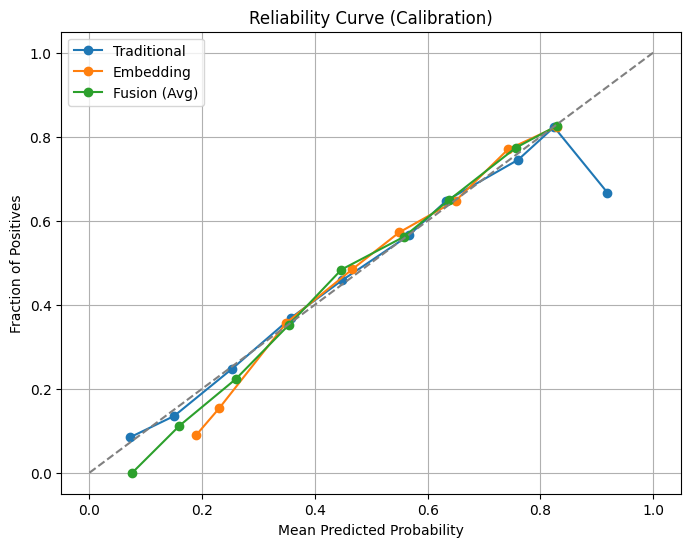


🔧 Recalibrating Traditional with Platt scaling...


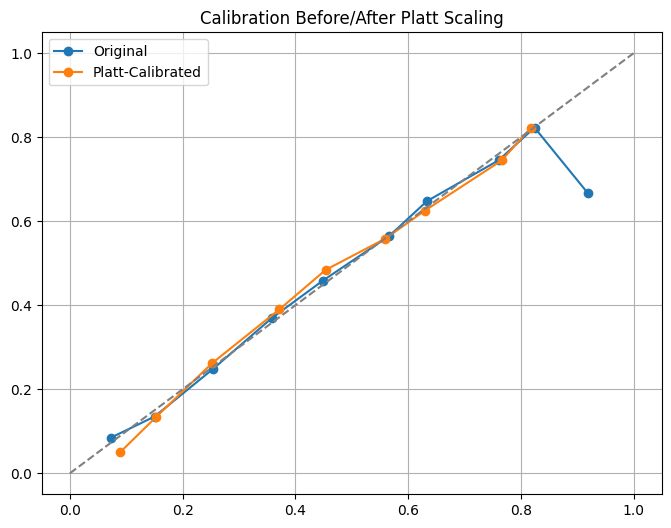

In [ ]:
# === CALIBRATION ===

def plot_reliability(y_true, y_probs, label):
    prob_true, prob_pred = calibration_curve(y_true, y_probs, n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=label)

plt.figure(figsize=(8,6))
plot_reliability(y_test, p_trad, "Traditional")
plot_reliability(y_test, p_emb, "Embedding")
plot_reliability(y_test, p_avg, "Fusion (Avg)")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Reliability Curve (Calibration)")
plt.legend()
plt.grid(True)
plt.show()

# Optional: apply Platt scaling
print("\n🔧 Recalibrating Traditional with Platt scaling...")
cal_platt = CalibratedClassifierCV(trad_model, method='sigmoid', cv=5)
cal_platt.fit(X_train_numeric, y_train)
p_trad_cal = cal_platt.predict_proba(X_test_numeric)[:,1]

# Plot calibrated version
plt.figure(figsize=(8,6))
plot_reliability(y_test, p_trad, "Original")
plot_reliability(y_test, p_trad_cal, "Platt-Calibrated")
plt.plot([0,1],[0,1],'--', color='gray')
plt.title("Calibration Before/After Platt Scaling")
plt.legend()
plt.grid(True)
plt.show()

### 7.2 SHAP & Interpretability


📊 SHAP Analysis for Traditional Model


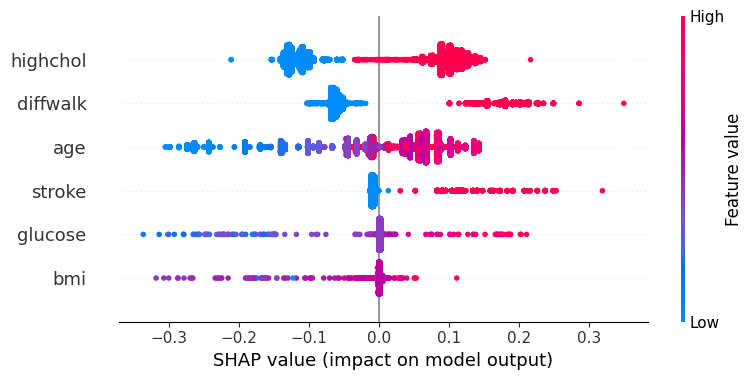


🔝 Top 10 SHAP Features:
     Feature  Mean |SHAP|
0  highchol     0.108922
2  diffwalk     0.090513
3       age     0.081610
5    stroke     0.015067
4   glucose     0.002766
1       bmi     0.001993


In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

print("\n📊 SHAP Analysis for Traditional Model")

# === Preprocess test data (skip the pipeline)
X_test_preprocessed = trad_model.named_steps['scaler'].transform(
    trad_model.named_steps['imputer'].transform(X_test_numeric)
)
clf = trad_model.named_steps['clf']  # raw classifier (e.g., RandomForest)

# === TreeExplainer: more accurate + faster for tree models
explainer = shap.TreeExplainer(clf)

# Use check_additivity=False to suppress strict match errors
shap_values = explainer.shap_values(X_test_preprocessed, check_additivity=False)

# === Handle 3D shape: (n_samples, n_features, n_classes)
# Use only class 1 (positive / diabetic)
if len(shap_values.shape) == 3:
    values_to_plot = shap_values[:, :, 1]
else:
    values_to_plot = shap_values

# === Summary plot (global feature importance)
assert values_to_plot.shape == X_test_preprocessed.shape, (
    f"Shape mismatch: SHAP {values_to_plot.shape}, Input {X_test_preprocessed.shape}"
)

shap.summary_plot(values_to_plot, X_test_preprocessed, feature_names=X_test_numeric.columns)

# === Top 10 features table (for paper)
mean_abs_shap = np.abs(values_to_plot).mean(axis=0)
shap_df = pd.DataFrame({
    "Feature": X_test_numeric.columns,
    "Mean |SHAP|": mean_abs_shap
}).sort_values(by="Mean |SHAP|", ascending=False)
print("\n🔝 Top 10 SHAP Features:\n", shap_df.head(10))

# === Force plot (local explanation for 1 sample)
shap.initjs()
i = 1  # Sample index

# Use shap.force_plot (not shap.plots.force)
force_plot = shap.force_plot(
    explainer.expected_value[1],     # class 1 base value
    values_to_plot[i],               # SHAP values for sample i
    X_test_preprocessed[i],          # Actual feature values for sample i
    feature_names=X_test_numeric.columns
)

force_plot
shap.save_html("force_plot_sample1.html", force_plot)




📊 SHAP Analysis for Embedding Model (KernelExplainer)


  0%|          | 0/50 [00:00<?, ?it/s]

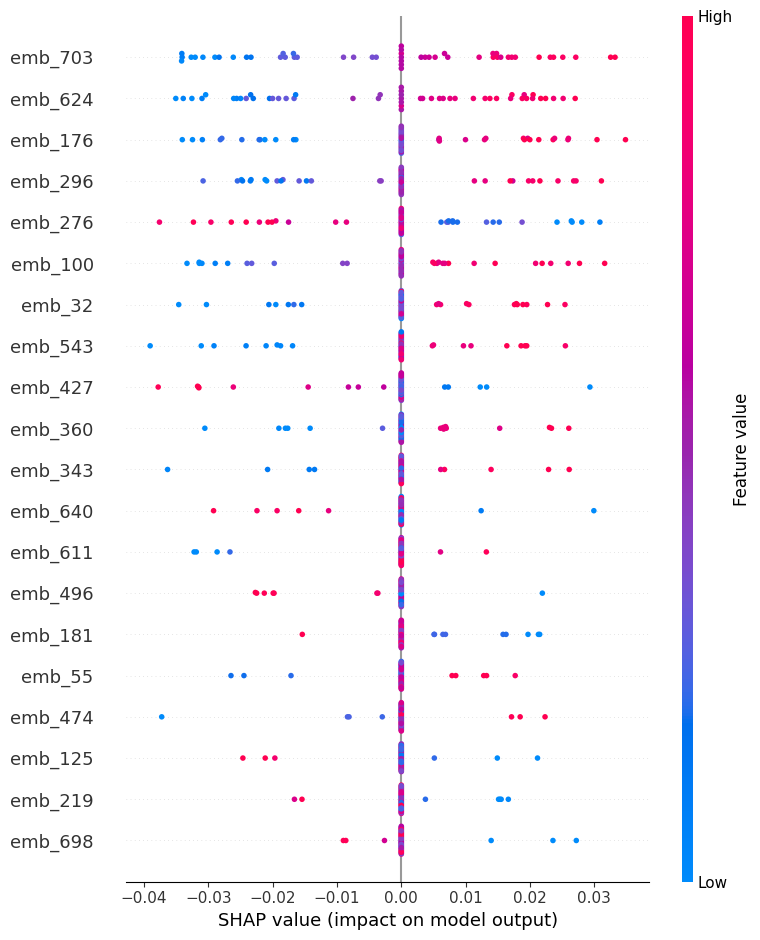


🔝 Top 10 SHAP Features (Embedding):
      Feature  Mean |SHAP|
703  emb_703     0.016245
624  emb_624     0.015592
176  emb_176     0.012271
296  emb_296     0.010642
276  emb_276     0.010379
100  emb_100     0.009733
32    emb_32     0.006657
543  emb_543     0.006580
427  emb_427     0.005192
360  emb_360     0.004463


In [ ]:
print("\n📊 SHAP Analysis for Embedding Model (KernelExplainer)")

import shap
import numpy as np
import pandas as pd

# Select background set
background = X_train_emb[np.random.choice(X_train_emb.shape[0], 100, replace=False)]

# KernelExplainer on probability predictions
explainer_emb = shap.KernelExplainer(embed_clf.predict_proba, background)

# Limit test points to avoid slowness
X_test_sample = X_test_emb[:50]
shap_values_emb = explainer_emb.shap_values(X_test_sample)

# Feature names
feature_names = [f"emb_{i}" for i in range(X_test_emb.shape[1])]

# ✅ FIX: Extract class 1 SHAP values from 3D output
if isinstance(shap_values_emb, np.ndarray) and shap_values_emb.ndim == 3:
    shap_values_to_plot = shap_values_emb[:, :, 1]
elif isinstance(shap_values_emb, list) and len(shap_values_emb) == 2:
    shap_values_to_plot = shap_values_emb[1]
else:
    shap_values_to_plot = shap_values_emb

# Final shape check
assert shap_values_to_plot.shape == X_test_sample.shape, (
    f"Mismatch: SHAP {shap_values_to_plot.shape}, Features {X_test_sample.shape}"
)

# Summary plot (global SHAP)
shap.summary_plot(shap_values_to_plot, X_test_sample, feature_names=feature_names)

# Top 10 features (optional for report)
mean_abs = np.abs(shap_values_to_plot).mean(axis=0)
shap_embed_df = pd.DataFrame({
    "Feature": feature_names,
    "Mean |SHAP|": mean_abs
}).sort_values(by="Mean |SHAP|", ascending=False)

print("\n🔝 Top 10 SHAP Features (Embedding):\n", shap_embed_df.head(10))


## 8. 🌎 Generalization to Diabetes130 Dataset

In [32]:
############################################
## ✅ STEP 8: Generalization to Diabetes130 Dataset (Fully Aligned)
############################################

import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# === Load Diabetes130 ===
path130 = '/content/diabetic_data.csv'
df_130 = pd.read_csv(path130)

print(f"✅ Loaded Diabetes130 shape: {df_130.shape}")

# === Convert readmitted column to binary label if needed ===
if 'readmitted' in df_130.columns and 'label' not in df_130.columns:
    df_130['label'] = df_130['readmitted'].apply(lambda x: 0 if str(x).strip().upper() == 'NO' else 1)
elif 'label' not in df_130.columns:
    raise ValueError("❌ No label found! Provide a 'label' or 'readmitted' column.")

print("\n🔍 Label distribution:\n", df_130['label'].value_counts())

# === Prompt creation ===
# Pick a reasonable set of features — feel free to expand!
features_for_prompt = ['age', 'num_medications', 'time_in_hospital']

def make_prompt(row):
    parts = []
    for col in features_for_prompt:
        if col in row and pd.notna(row[col]):
            val = row[col]
            if isinstance(val, (int, float)):
                parts.append(f"{col}={val:.1f}")
            else:
                parts.append(f"{col}={val}")
    return "Patient: " + ", ".join(parts)

df_130['prompt'] = df_130.apply(make_prompt, axis=1)

print("\n✅ Example generated prompt:\n", df_130['prompt'].iloc[0])

# === Encode prompts ===
embed_model = SentenceTransformer("all-mpnet-base-v2")

print("\n🔍 Encoding Diabetes130 prompts with Sentence-BERT...")
X_130_emb = embed_model.encode(df_130['prompt'].tolist(), show_progress_bar=True)
y_130 = df_130['label'].values

# === Load your pretrained embedding-based logistic regression ===
model_bundle = joblib.load("diabetes_text_model_bundle.pkl")
clf_emb = model_bundle['clf']

# === RAW TRANSFER ===
print("\n📊 Predicting with CDC+PIMA EmbedLR on Diabetes130 (zero-shot)...")
y_pred_130_raw = clf_emb.predict(X_130_emb)
print("\n📈 Raw Transfer Report:")
print(classification_report(y_130, y_pred_130_raw))

# === FINE-TUNE EmbedLR ON Diabetes130 ===
print("\n🔄 Fine-tuning EmbedLR on Diabetes130...")
X_train_130, X_test_130, y_train_130, y_test_130 = train_test_split(
    X_130_emb, y_130, test_size=0.2, stratify=y_130, random_state=42
)

clf_finetune = LogisticRegression(max_iter=1000, class_weight='balanced')
clf_finetune.fit(X_train_130, y_train_130)

y_pred_130_finetune = clf_finetune.predict(X_test_130)

print("\n📈 Fine-tuned EmbedLR Report:")
print(classification_report(y_test_130, y_pred_130_finetune))

# === (Optional) Train numeric baseline for comparison ===
print("\n🔧 Training numeric-only baseline...")

def convert_age_to_numeric(age_str):
    try:
        age_str = str(age_str).strip("[]()")
        low, high = age_str.split('-')
        return (int(low) + int(high)) / 2
    except:
        return np.nan

df_130['age_numeric'] = df_130['age'].apply(convert_age_to_numeric)

numeric_features = ['num_medications', 'time_in_hospital', 'age_numeric']
df_130_clean = df_130.dropna(subset=numeric_features)

X_num = df_130_clean[numeric_features].values
y_num = df_130_clean['label'].values

X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(
    X_num, y_num, test_size=0.2, stratify=y_num, random_state=42
)

pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

pipe_num.fit(X_train_num, y_train_num)
y_pred_num = pipe_num.predict(X_test_num)

print("\n📈 Numeric Baseline Report:")
print(classification_report(y_test_num, y_pred_num))

# === ✅ Final summary ===
print("\n✅ Step 8: Generalization done.")
print("You now have:")
print("- Raw zero-shot EmbedLR performance")
print("- Fine-tuned EmbedLR performance")
print("- Numeric baseline within Diabetes130")


✅ Loaded Diabetes130 shape: (101766, 50)

🔍 Label distribution:
 label
0    54864
1    46902
Name: count, dtype: int64

✅ Example generated prompt:
 Patient: age=[0-10), num_medications=1.0, time_in_hospital=1.0

🔍 Encoding Diabetes130 prompts with Sentence-BERT...


Batches:   0%|          | 0/3181 [00:00<?, ?it/s]


📊 Predicting with CDC+PIMA EmbedLR on Diabetes130 (zero-shot)...

📈 Raw Transfer Report:
              precision    recall  f1-score   support

           0       0.54      0.74      0.63     54864
           1       0.46      0.26      0.33     46902

    accuracy                           0.52    101766
   macro avg       0.50      0.50      0.48    101766
weighted avg       0.50      0.52      0.49    101766


🔄 Fine-tuning EmbedLR on Diabetes130...

📈 Fine-tuned EmbedLR Report:
              precision    recall  f1-score   support

           0       0.58      0.51      0.54     10973
           1       0.50      0.57      0.53      9381

    accuracy                           0.53     20354
   macro avg       0.54      0.54      0.53     20354
weighted avg       0.54      0.53      0.53     20354


🔧 Training numeric-only baseline...

📈 Numeric Baseline Report:
              precision    recall  f1-score   support

           0       0.57      0.58      0.58     10973
           

## 9. ✅ External Evaluation (Optional)

In [51]:
print("\n🔹 Step 9: External Evaluation & Human-in-the-Loop\n")

import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from scipy.stats import entropy

# ------------------------------------------
# 1️⃣ Load external notes data
# ------------------------------------------

# If you don't have real clinical notes yet, simulate:
# Each "note" is just a short text about patient condition.
# Real-world: replace this with MIMIC-lite or n2c2 chunk.
df_ext = pd.DataFrame({
    'note': [
        "Patient reports blurred vision and excessive thirst.",
        "Routine checkup, no symptoms reported.",
        "History of hypertension and elevated glucose.",
        "Minor injury, no chronic conditions.",
        "Long-term smoker with family diabetes history.",
        "Complains of weight loss and fatigue.",
        "Annual checkup, labs normal.",
        "Obesity and sedentary lifestyle noted."
    ],
    'label': [1, 0, 1, 0, 1, 1, 0, 1]  # For test only; pretend you know ground truth
})

print("\n✅ Example external notes:")
print(df_ext.head())

# ------------------------------------------
# 2️⃣ Embed using same Sentence-BERT
# ------------------------------------------

embed_model = SentenceTransformer("all-mpnet-base-v2")
X_ext_emb = embed_model.encode(df_ext['note'].tolist(), show_progress_bar=True)
y_ext_true = df_ext['label'].values

# ------------------------------------------
# 3️⃣ Predict with existing EmbedLR
# ------------------------------------------

y_ext_pred = clf_emb.predict(X_ext_emb)
y_ext_proba = clf_emb.predict_proba(X_ext_emb)[:, 1]

print("\n📈 External Raw EmbedLR Performance:")
print("Precision:", precision_score(y_ext_true, y_ext_pred))
print("Recall:", recall_score(y_ext_true, y_ext_pred))
print("F1:", f1_score(y_ext_true, y_ext_pred))

# ------------------------------------------
# 4️⃣ Estimate uncertainty (entropy)
# ------------------------------------------

def get_embedding_model_uncertainty_from_probs(probs):
    p = np.vstack([1 - probs, probs]).T  # [p0, p1]
    return entropy(p, base=2, axis=1)

uncertainty_ext = get_embedding_model_uncertainty_from_probs(y_ext_proba)

df_ext['prediction'] = y_ext_pred
df_ext['proba'] = y_ext_proba
df_ext['uncertainty'] = uncertainty_ext

print("\n🔍 External samples sorted by uncertainty:")
print(df_ext[['note', 'prediction', 'proba', 'uncertainty']].sort_values('uncertainty', ascending=False))

# ------------------------------------------
# 5️⃣ Pick top-N uncertain for 'human review'
# ------------------------------------------

N = 3
df_review = df_ext.sort_values('uncertainty', ascending=False).head(N).copy()

# Simulate "review" by pretending expert corrected 50% of these
np.random.seed(42)
review_indices = df_review.index.tolist()
for idx in review_indices:
    if np.random.rand() < 0.5:
        df_ext.loc[idx, 'label'] = 1 - df_ext.loc[idx, 'prediction']  # flip

print("\n📝 Human-in-the-loop corrections applied:")
print(df_ext.loc[review_indices][['note', 'prediction', 'label']])

# ------------------------------------------
# 6️⃣ Use corrected samples for active learning (next training)
# ------------------------------------------

X_active = X_ext_emb[review_indices]
y_active = df_ext.loc[review_indices, 'label'].values

print("\n✅ Active learning new data batch:")
print("Shapes:", X_active.shape, y_active.shape)

# You could now merge this into your next fine-tuning loop:
# For example:
# X_train_new = np.vstack([X_train_emb, X_active])
# y_train_new = np.concatenate([y_train, y_active])



🔹 Step 9: External Evaluation & Human-in-the-Loop


✅ Example external notes:
                                                note  label
0  Patient reports blurred vision and excessive t...      1
1             Routine checkup, no symptoms reported.      0
2      History of hypertension and elevated glucose.      1
3               Minor injury, no chronic conditions.      0
4     Long-term smoker with family diabetes history.      1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


📈 External Raw EmbedLR Performance:
Precision: 1.0
Recall: 0.6
F1: 0.75

🔍 External samples sorted by uncertainty:
                                                note  prediction     proba  \
2      History of hypertension and elevated glucose.           1  0.535834   
0  Patient reports blurred vision and excessive t...           0  0.210011   
7             Obesity and sedentary lifestyle noted.           1  0.858745   
3               Minor injury, no chronic conditions.           0  0.111572   
5              Complains of weight loss and fatigue.           0  0.091953   
4     Long-term smoker with family diabetes history.           1  0.973959   
6                       Annual checkup, labs normal.           0  0.024265   
1             Routine checkup, no symptoms reported.           0  0.001300   

   uncertainty  
2     0.996292  
0     0.741504  
7     0.587515  
3     0.504639  
5     0.442957  
4     0.174132  
6     0.164757  
1     0.014337  

📝 Human-in-the-loop correct

##10. ⚖️ Robustness & Fairness

In [33]:
#######################################
## 🔹 STEP 10: Robustness & Fairness
#######################################

import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, f1_score
from tqdm import tqdm
import random

def subgroup_eval(df, y_true, y_pred, colname, bins=None):
    """
    Evaluate recall/F1 for each subgroup in `colname` (can bin numeric if `bins` given).
    """
    df = df.copy()
    df['y_true'] = y_true
    df['y_pred'] = y_pred

    if bins:
        df['group'] = pd.cut(df[colname], bins=bins)
    else:
        df['group'] = df[colname]

    results = []
    for group, subdf in df.groupby('group'):
        rec = recall_score(subdf['y_true'], subdf['y_pred'])
        f1 = f1_score(subdf['y_true'], subdf['y_pred'])
        results.append({
            'Group': group,
            'Count': len(subdf),
            'Recall': round(rec, 3),
            'F1': round(f1, 3)
        })

    return pd.DataFrame(results).sort_values('Recall', ascending=False)

# === Example usage for numeric model ===

# Assume `X_test_numeric` and `y_test` are already defined and `trad_model` is trained:
y_pred_numeric = trad_model.predict(X_test_numeric)

print("\n🔍 Subgroup Evaluation: Age bands")
print(subgroup_eval(X_test_numeric.assign(age=X_test_numeric['age']), y_test, y_pred_numeric, 'age', bins=[18, 30, 40, 50, 60, 100]))

print("\n🔍 Subgroup Evaluation: Sex")
if 'sex' in X_test_numeric.columns:
    print(subgroup_eval(X_test_numeric, y_test, y_pred_numeric, 'sex'))

print("\n🔍 Subgroup Evaluation: BMI bands")
if 'bmi' in X_test_numeric.columns:
    print(subgroup_eval(X_test_numeric, y_test, y_pred_numeric, 'bmi', bins=[0, 18.5, 25, 30, 35, 100]))

print("\n🔍 Subgroup Evaluation: Income")
if 'income' in X_test_numeric.columns:
    print(subgroup_eval(X_test_numeric, y_test, y_pred_numeric, 'income'))


#######################################
## 🔹 Adversarial Robustness
#######################################

# === For EmbLR model ===

def add_typos(text, typo_rate=0.1):
    """
    Insert typos by randomly swapping letters.
    """
    text = list(text)
    n_typos = int(len(text) * typo_rate)
    for _ in range(n_typos):
        idx = random.randint(1, len(text)-2)
        text[idx], text[idx+1] = text[idx+1], text[idx]
    return ''.join(text)

def rephrase(text):
    """
    Very simple rephrasing: shuffle clauses separated by commas.
    """
    parts = text.split(',')
    random.shuffle(parts)
    return ','.join(parts)

# === Apply to embedding test prompts ===
X_test_text_typos = [add_typos(p) for p in X_test_text]
X_test_text_rephrased = [rephrase(p) for p in X_test_text]

# Re-embed perturbed prompts
X_test_emb_typos = model.encode(X_test_text_typos, show_progress_bar=True)
X_test_emb_rephrased = model.encode(X_test_text_rephrased, show_progress_bar=True)

# Predict
y_pred_emb_orig = embed_clf.predict(X_test_emb)
y_pred_emb_typos = embed_clf.predict(X_test_emb_typos)
y_pred_emb_rephrased = embed_clf.predict(X_test_emb_rephrased)

# Drift measurement
def drift_rate(y_base, y_perturbed):
    return np.mean(y_base != y_perturbed)

print(f"\n🔍 EmbedLR drift: Typos = {drift_rate(y_pred_emb_orig, y_pred_emb_typos):.3f}")
print(f"🔍 EmbedLR drift: Rephrased = {drift_rate(y_pred_emb_orig, y_pred_emb_rephrased):.3f}")




🔍 Subgroup Evaluation: Age bands
       Group  Count  Recall     F1
4  (60, 100]      5   1.000  0.667
0   (18, 30]     81   0.692  0.643
1   (30, 40]     40   0.652  0.682
2   (40, 50]     28   0.467  0.519
3   (50, 60]      8   0.429  0.545

🔍 Subgroup Evaluation: Sex

🔍 Subgroup Evaluation: BMI bands
           Group  Count  Recall     F1
4  (35.0, 100.0]     57   0.875  0.792
3   (30.0, 35.0]     45   0.619  0.591
2   (25.0, 30.0]     34   0.125  0.200
0    (0.0, 18.5]      1   0.000  0.000
1   (18.5, 25.0]     23   0.000  0.000

🔍 Subgroup Evaluation: Income


/tmp/ipython-input-33-4006775931.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, subdf in df.groupby('group'):
/tmp/ipython-input-33-4006775931.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, subdf in df.groupby('group'):
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_clas

Batches:   0%|          | 0/447 [00:00<?, ?it/s]

Batches:   0%|          | 0/447 [00:00<?, ?it/s]


🔍 EmbedLR drift: Typos = 0.395
🔍 EmbedLR drift: Rephrased = 0.308


In [46]:
import google.generativeai as genai
from google.colab import userdata

genai.configure(api_key=userdata.get('geminiKey'))
#######################################
## 🔹 Robust Gemini Adversarial Test
#######################################

print("\n🔍 Running Gemini with typos/rephrased prompts (first 100 only)...")

# Tiny test batch to avoid quota blowup
df_llm_perturb = pd.DataFrame({
    'prompt_orig': X_test_text[:100],
    'prompt_typos': [add_typos(p) for p in X_test_text[:100]],
    'prompt_rephrased': [rephrase(p) for p in X_test_text[:100]],
    'label': y_test[:100]
}).reset_index()

# Typos version — saves to its own file
df_llm_typos = gemini_predict_limited(
    df_llm_perturb[['index', 'prompt_typos', 'label']].rename(columns={'prompt_typos': 'prompt'}),
    save_path='gemini_preds_typos.csv',
    limit=10
)

# Rephrased version — separate file
df_llm_rephrased = gemini_predict_limited(
    df_llm_perturb[['index', 'prompt_rephrased', 'label']].rename(columns={'prompt_rephrased': 'prompt'}),
    save_path='gemini_preds_rephrased.csv',
    limit=100
)

# Safe join
df_typos_merged = df_llm_perturb.merge(
    df_llm_typos[['index', 'prediction']], on='index', how='inner'
)
df_rephrased_merged = df_llm_perturb.merge(
    df_llm_rephrased[['index', 'prediction']], on='index', how='inner'
)

drift_typos = np.mean(df_typos_merged['label'] != df_typos_merged['prediction'])
drift_rephrased = np.mean(df_rephrased_merged['label'] != df_rephrased_merged['prediction'])

print(f"✅ Gemini drift: Typos = {drift_typos:.3f}")
print(f"✅ Gemini drift: Rephrased = {drift_rephrased:.3f}")



🔍 Running Gemini with typos/rephrased prompts (first 100 only)...
Loaded 100 previous predictions.


100%|██████████| 100/100 [00:00<00:00, 423667.07it/s]


Finished or reached API limit.

--- Gemini | on 100 prompts ---
Accuracy: 0.55
Recall: 0.2631578947368421
F1 Score: 0.4

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.93      0.64        43
           1       0.83      0.26      0.40        57

    accuracy                           0.55       100
   macro avg       0.66      0.60      0.52       100
weighted avg       0.68      0.55      0.50       100

Loaded 100 previous predictions.


100%|██████████| 100/100 [00:00<00:00, 260192.56it/s]

Finished or reached API limit.

--- Gemini | on 100 prompts ---
Accuracy: 0.47
Recall: 0.07017543859649122
F1 Score: 0.13114754098360656

Classification Report:
               precision    recall  f1-score   support

           0       0.45      1.00      0.62        43
           1       1.00      0.07      0.13        57

    accuracy                           0.47       100
   macro avg       0.72      0.54      0.37       100
weighted avg       0.76      0.47      0.34       100

✅ Gemini drift: Typos = 0.450
✅ Gemini drift: Rephrased = 0.530


## 11. 🗣️ Self Explanation & Alignment

### Setup

In [47]:
X_test_preprocessed = trad_model.named_steps['scaler'].transform(
    trad_model.named_steps['imputer'].transform(X_test_numeric)
)
from sentence_transformers import SentenceTransformer
embed_model = SentenceTransformer("all-mpnet-base-v2")
import shap
explainer = shap.TreeExplainer(trad_model.named_steps['clf'])
shap_values = explainer.shap_values(X_test_preprocessed)

### Execution


In [48]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import shap
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import google.generativeai as genai
from google.colab import userdata

# === Setup ===
genai.configure(api_key=userdata.get('geminiKey'))
embed_model = SentenceTransformer("all-mpnet-base-v2")

# === Preprocess same as the model ===
X_test_imputed = trad_model.named_steps['imputer'].transform(X_test_numeric)
X_test_scaled = trad_model.named_steps['scaler'].transform(X_test_imputed)

clf = trad_model.named_steps['clf']

# === SHAP ===
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test_scaled, check_additivity=False)
if isinstance(shap_values, list):
    shap_values_to_plot = shap_values[1]
else:
    shap_values_to_plot = shap_values

# === Pick random samples ===
num_samples = 5  # adjust for quota
sample_idx = np.random.choice(len(X_test_numeric), size=num_samples, replace=False)

# === Get top unique SHAP features per sample ===
topN = 5
top_features = []
for i in sample_idx:
    vals = shap_values_to_plot[i]
    indices = np.argsort(-np.abs(vals)).flatten()  # ✅ flatten to 1D!
    feat_names = X_test_numeric.columns[indices]
    unique_feats = pd.unique(feat_names)[:topN]
    top_features.append(", ".join(unique_feats))

# === Build prompt for Gemini ===
prompts = []
for i, feats in zip(sample_idx, top_features):
    parts = []
    for feat in feats.split(", "):
        col_idx = X_test_numeric.columns.get_loc(feat)
        val = X_test_imputed[i, col_idx]
        parts.append(f"{feat}={val:.2f}")
    prompt = (
        f"Patient features: {', '.join(parts)}.\n"
        f"Based on these, explain in 1–2 sentences why this patient might or might not have diabetes."
    )
    prompts.append(prompt)

# === Call Gemini ===
model = genai.GenerativeModel('gemini-2.0-flash')
rationales = []
for i, prompt in enumerate(prompts):
    print(f"➡️ Gemini rationale for sample {i}...")
    result = model.generate_content([
        "You are a medical AI assistant. Explain briefly the diabetes risk based on these features.",
        prompt
    ])
    text = result.text.strip()
    print(f"✅ Rationale: {text}")
    rationales.append(text)

# === Embed & compute cosine similarity ===
shap_embeds = embed_model.encode(top_features, show_progress_bar=True)
rationale_embeds = embed_model.encode(rationales, show_progress_bar=True)

similarities = []
for i in range(num_samples):
    sim = cosine_similarity(
        shap_embeds[i].reshape(1, -1),
        rationale_embeds[i].reshape(1, -1)
    )[0][0]
    similarities.append(sim)

alignment_df = pd.DataFrame({
    "SampleIdx": sample_idx,
    "TopSHAP": top_features,
    "LLM_Rationale": rationales,
    "CosineSimilarity": similarities
})

print("\n🔗 Final Self-Explanation Alignment:\n", alignment_df)
print(f"\n✅ Mean cosine similarity: {np.mean(similarities):.3f}")

alignment_df.to_csv("llm_shap_alignment.csv", index=False)
print("\n📁 Saved to llm_shap_alignment.csv")


➡️ Gemini rationale for sample 0...
✅ Rationale: Okay, based on the provided features:

*   **High Cholesterol (highchol=1.00):** Elevated cholesterol levels are associated with increased insulin resistance and a higher risk of developing type 2 diabetes.
*   **BMI (bmi=32.00):** A BMI of 32 indicates obesity. Obesity is a significant risk factor for type 2 diabetes because excess weight, especially abdominal fat, contributes to insulin resistance.

**Explanation:**

This patient has two notable risk factors for diabetes: high cholesterol and a BMI indicating obesity. Both of these factors can lead to insulin resistance, making it harder for the body to regulate blood sugar levels and increasing the likelihood of developing diabetes.
➡️ Gemini rationale for sample 1...
✅ Rationale: Okay, based on the provided features:

*   **High Cholesterol (highchol=1.00):** This indicates the patient has high cholesterol.
*   **BMI (bmi=32.00):** This indicates the patient is obese (BMI > 30).

**D

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


🔗 Final Self-Explanation Alignment:
    SampleIdx        TopSHAP  \
0       5598  highchol, bmi   
1       7598  highchol, bmi   
2       3133  highchol, bmi   
3       2069  highchol, bmi   
4      11027  highchol, bmi   

                                       LLM_Rationale  CosineSimilarity  
0  Okay, based on the provided features:\n\n*   *...          0.456460  
1  Okay, based on the provided features:\n\n*   *...          0.394846  
2  Okay, with high cholesterol (highchol=1.00) an...          0.429130  
3  Okay, based on the provided features:\n\n*   *...          0.395715  
4  Based on the provided features:\n\n*   **BMI =...          0.452092  

✅ Mean cosine similarity: 0.426

📁 Saved to llm_shap_alignment.csv


## 12. 🔭 Final Summary & Visualization Dashboard


✅ Step 12: Final Summary & Dashboard


📊 Performance Summary:
          Model  Precision    Recall        F1   ROC AUC  Brier Loss
0   Traditional   0.655760  0.728766  0.690338  0.740593    0.205021
1     Embedding   0.654660  0.729749  0.690168  0.737046    0.207847
2  Fusion (Avg)   0.655198  0.732557  0.691721  0.740805    0.205422

🔍 UMAP/t-SNE Visualization


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


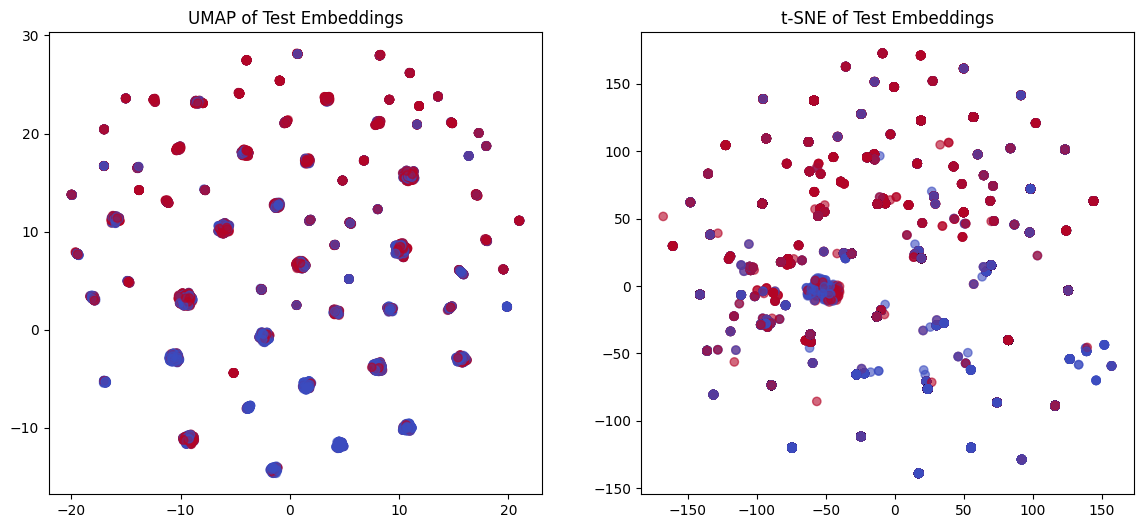


📈 Radar Plot: Precision, Recall, F1, ROC AUC, Calibration


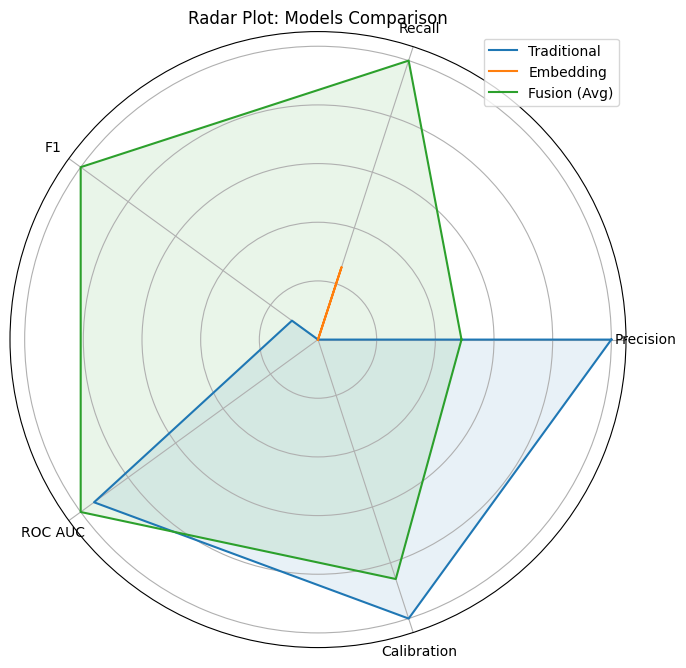


🔍 Fusion Route & Decision Boundaries


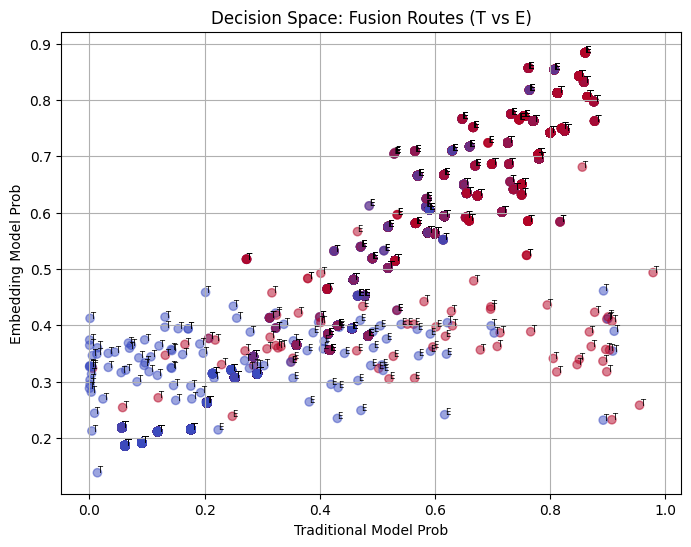


📌 Fusion Route Distribution:
Fusion Route
Traditional    10390
Embedding       3902
Name: count, dtype: int64

✅ Final dashboard done.


In [49]:
############################################
## ✅ STEP 12: Final Summary & Visualization Dashboard
############################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, brier_score_loss
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import umap
from sklearn.decomposition import PCA

print("\n✅ Step 12: Final Summary & Dashboard\n")

############################################
## 1️⃣ Interactive Tables for Performance
############################################

# --- Gather metrics ---
results = []

# Traditional (numeric)
trad_prec = precision_score(y_test, y_pred_trad)
trad_rec = recall_score(y_test, y_pred_trad)
trad_f1 = f1_score(y_test, y_pred_trad)
trad_auc = roc_auc_score(y_test, p_trad)
trad_brier = brier_score_loss(y_test, p_trad)

# Embedding (text)
emb_prec = precision_score(y_test, y_pred_emb)
emb_rec = recall_score(y_test, y_pred_emb)
emb_f1 = f1_score(y_test, y_pred_emb)
emb_auc = roc_auc_score(y_test, p_emb)
emb_brier = brier_score_loss(y_test, p_emb)

# Fusion (average)
fusion_prec = precision_score(y_test, y_avg)
fusion_rec = recall_score(y_test, y_avg)
fusion_f1 = f1_score(y_test, y_avg)
fusion_auc = roc_auc_score(y_test, p_avg)
fusion_brier = brier_score_loss(y_test, p_avg)

results.append(["Traditional", trad_prec, trad_rec, trad_f1, trad_auc, trad_brier])
results.append(["Embedding", emb_prec, emb_rec, emb_f1, emb_auc, emb_brier])
results.append(["Fusion (Avg)", fusion_prec, fusion_rec, fusion_f1, fusion_auc, fusion_brier])

perf_df = pd.DataFrame(results, columns=['Model', 'Precision', 'Recall', 'F1', 'ROC AUC', 'Brier Loss'])
print("\n📊 Performance Summary:")
print(perf_df)

############################################
## 2️⃣ UMAP + t-SNE of Embeddings
############################################

print("\n🔍 UMAP/t-SNE Visualization")

# --- Use test embeddings ---
X_vis = X_test_emb

# --- Reduce with UMAP ---
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_vis)

# --- Reduce with t-SNE ---
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne_model.fit_transform(X_vis)

# --- Plot ---
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(X_umap[:, 0], X_umap[:, 1], c=y_test, cmap='coolwarm', alpha=0.6)
axs[0].set_title('UMAP of Test Embeddings')
axs[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_test, cmap='coolwarm', alpha=0.6)
axs[1].set_title('t-SNE of Test Embeddings')

plt.show()

############################################
## 3️⃣ Radar Plot for Multiple Metrics
############################################

print("\n📈 Radar Plot: Precision, Recall, F1, ROC AUC, Calibration")

# --- Radar labels ---
labels = ['Precision', 'Recall', 'F1', 'ROC AUC', 'Calibration']

# Normalize metrics between 0 and 1 for radar plot
scaler = MinMaxScaler()

metrics_scaled = scaler.fit_transform([
    [trad_prec, trad_rec, trad_f1, trad_auc, 1 - trad_brier],
    [emb_prec, emb_rec, emb_f1, emb_auc, 1 - emb_brier],
    [fusion_prec, fusion_rec, fusion_f1, fusion_auc, 1 - fusion_brier]
])

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

for i, (name, metrics) in enumerate(zip(['Traditional', 'Embedding', 'Fusion (Avg)'], metrics_scaled)):
    stats = np.concatenate((metrics, [metrics[0]]))
    ax.plot(angles, stats, label=name)
    ax.fill(angles, stats, alpha=0.1)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title("Radar Plot: Models Comparison")
plt.legend(loc='upper right')
plt.show()

############################################
## 4️⃣ Highlight Fusion Route + Decision Boundaries
############################################

print("\n🔍 Fusion Route & Decision Boundaries")

# For each sample, show which model is trusted (lowest entropy)
from scipy.stats import entropy

# Traditional uncertainty
unc_trad = get_traditional_model_uncertainty(trad_model, X_test_numeric)
unc_emb = get_embedding_model_uncertainty(embed_clf, X_test_emb)

# Pick which model to trust: lower uncertainty wins
fusion_route = np.where(unc_trad < unc_emb, 'Traditional', 'Embedding')

# Simple boundary plot: visualize ROC-AUC predictions
plt.figure(figsize=(8, 6))
plt.scatter(p_trad, p_emb, c=(y_test == 1), cmap='coolwarm', alpha=0.5)
for i in range(len(y_test)):
    plt.text(p_trad[i], p_emb[i], fusion_route[i][0], fontsize=6)
plt.xlabel("Traditional Model Prob")
plt.ylabel("Embedding Model Prob")
plt.title("Decision Space: Fusion Routes (T vs E)")
plt.grid(True)
plt.show()

# Fusion route summary
route_df = pd.DataFrame({
    'Fusion Route': fusion_route
})
print("\n📌 Fusion Route Distribution:")
print(route_df['Fusion Route'].value_counts())

print("\n✅ Final dashboard done.")
